In [ ]:
!pip install kagglehub --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.13
    Uninstalling kagglehub-0.3.13:
      Successfully uninstalled kagglehub-0.3.13


In [ ]:
import kagglehub

In [ ]:
kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

Using Colab cache for faster access to the 'million-song-dataset-spotify-lastfm' dataset.


'/kaggle/input/million-song-dataset-spotify-lastfm'

In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# getting path of the dataset

data_path = Path("/kaggle/input/million-song-dataset-spotify-lastfm")

songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

In [ ]:
songs_data_path


PosixPath('/kaggle/input/million-song-dataset-spotify-lastfm/Music Info.csv')

In [ ]:
# loading the songs data

songs_df = pd.read_csv(songs_data_path, usecols=["track_id","name","artist","spotify_preview_url"])
songs_df.head()

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...


In [ ]:
! pip install dask[dataframe]

In [ ]:
import dask.dataframe as dd

# Load the dataset
df = dd.read_csv(users_data_path)

df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [ ]:
df

,track_id,user_id,playcount
npartitions=9,,,
,string,string,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


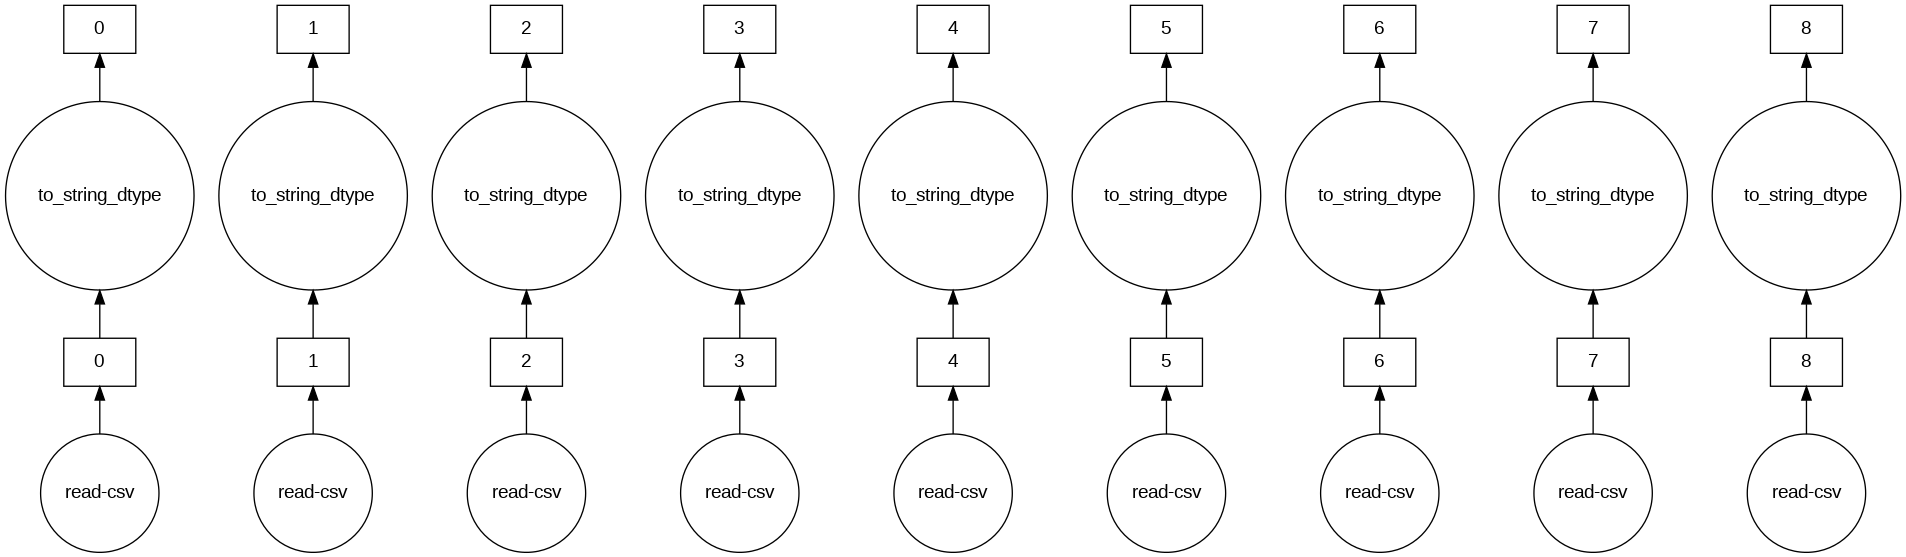

In [ ]:
df.visualize(tasks=True)

In [ ]:
# no. of unique tracks in data

unique_tracks = df['track_id'].nunique()
unique_tracks = unique_tracks.compute()
unique_tracks

np.int64(30459)

In [ ]:
# no. of unique users in the data

unique_users = df['user_id'].nunique()
unique_users = unique_users.compute()
unique_users

np.int64(962037)

In [ ]:
# list of unique track_ids

unique_tracks_ids = df['track_id'].unique()
unique_tracks_ids = unique_tracks_ids.compute()
unique_tracks_ids = unique_tracks_ids.tolist()
unique_tracks_ids

['TRLXSNR128F429361D',
 'TRPUGUW128F426BF6F',
 'TRISTWT128F1488FBB',
 'TRKPWGR128E078EE06',
 'TRXQJWK128F146DF76',
 'TRGASNY128F14696B0',
 'TRSQWMI128F932FC8A',
 'TRBVNWT128F93173BA',
 'TRBHQZM128F42A52D2',
 'TRSWJHK128F429EA6F',
 'TRRUZLF128F42396D0',
 'TRMPCGW128F92E0670',
 'TRJNMNC128F427ED16',
 'TRWCIAX128F42925BD',
 'TRGVKBK128F429EA2D',
 'TRGRPEU128F932BD78',
 'TRANEZZ128F92FFC06',
 'TRRYLYK128F92F89F6',
 'TRQGHWL128EF33FB48',
 'TRWZFIC128F933BCA3',
 'TRKSEEY12903CCD312',
 'TRBTCYJ128F92F9586',
 'TRQPRPK12903CCF3B6',
 'TRJSQQT128F149F9B4',
 'TREWPIM128F4261B51',
 'TRMZPXZ128F92F3495',
 'TRTGEVW128F14979BB',
 'TROUMHD128F9355B89',
 'TRKRNZF12903CB52BC',
 'TRBSBCX128F92DEF11',
 'TRXHDTA128F42A077A',
 'TRSJBLT128F429EA02',
 'TRTJYDU128F92E49EE',
 'TRDTMGK12903CC557F',
 'TRBOAJY128F14979B5',
 'TRBYDXV128F424888B',
 'TRCIOVJ128F429EB51',
 'TRYBFNR128F426BE3D',
 'TRWOYHS128F931EB5A',
 'TRNNLYM128F92EDE7F',
 'TRATHTH128F42BC347',
 'TRXERRS128F42969E4',
 'TRZPVLJ128F148D2F7',
 'TRGTVVB12

In [ ]:
len(unique_tracks_ids)

30459

In [ ]:
# filtered songs

filtered_songs = songs_df[songs_df['track_id'].isin(unique_tracks_ids)]
filtered_songs.reset_index(drop=True, inplace=True)
filtered_songs.head()

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...


In [ ]:
filtered_songs[filtered_songs["name"] == "Karma Police"]

,track_id,name,artist,spotify_preview_url
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...


In [ ]:
import dask.dataframe as dd
import numpy as np
from scipy.sparse import csr_matrix

# Step 1: Load data with Dask
# Assume the dataset is in a CSV file
# Note: 'users_data_path' needs to be defined with your file path before running this
df = dd.read_csv(users_data_path)

# Step 2: Ensure playcount is numeric
df['playcount'] = df['playcount'].astype(np.float64)
df = df.categorize(columns=['user_id', 'track_id'])

# Step 3: Convert user_id and track_id to numeric indices
# This is necessary for creating a sparse matrix later
user_mapping = df['user_id'].cat.codes
track_mapping = df['track_id'].cat.codes

df = df.assign(
    user_idx=user_mapping,
    track_idx=track_mapping
)

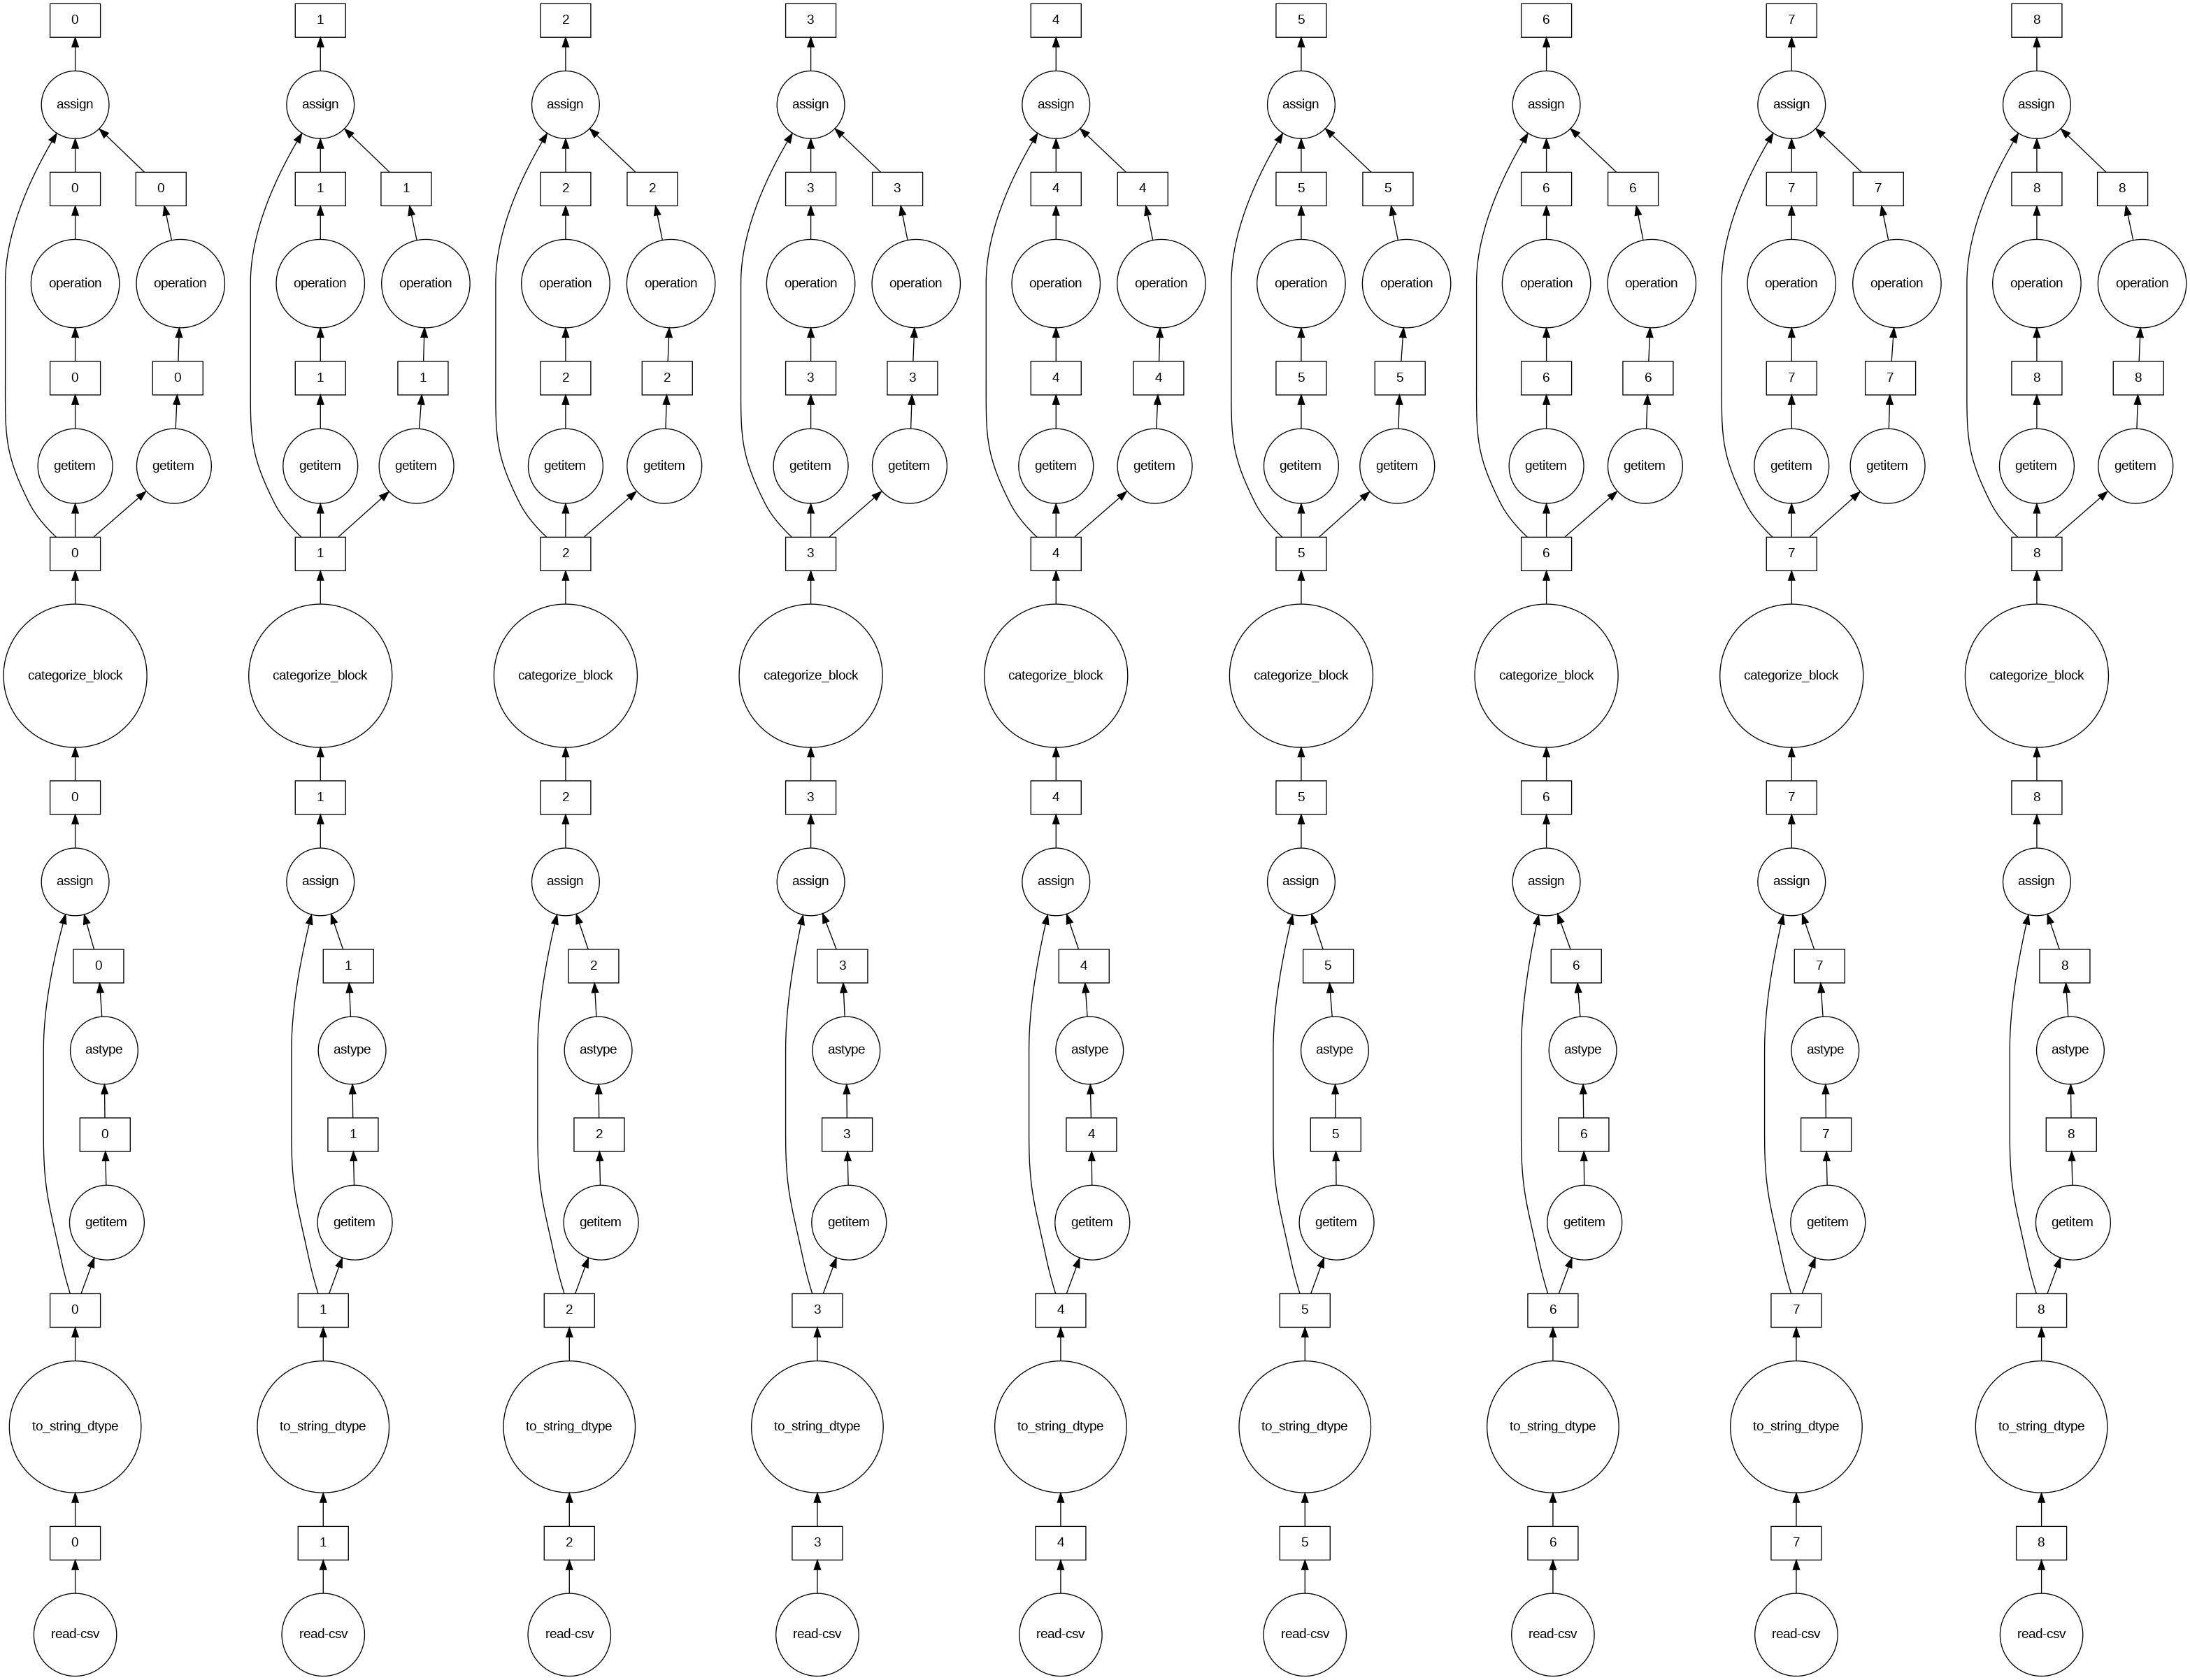

In [ ]:
df.visualize(tasks=True)

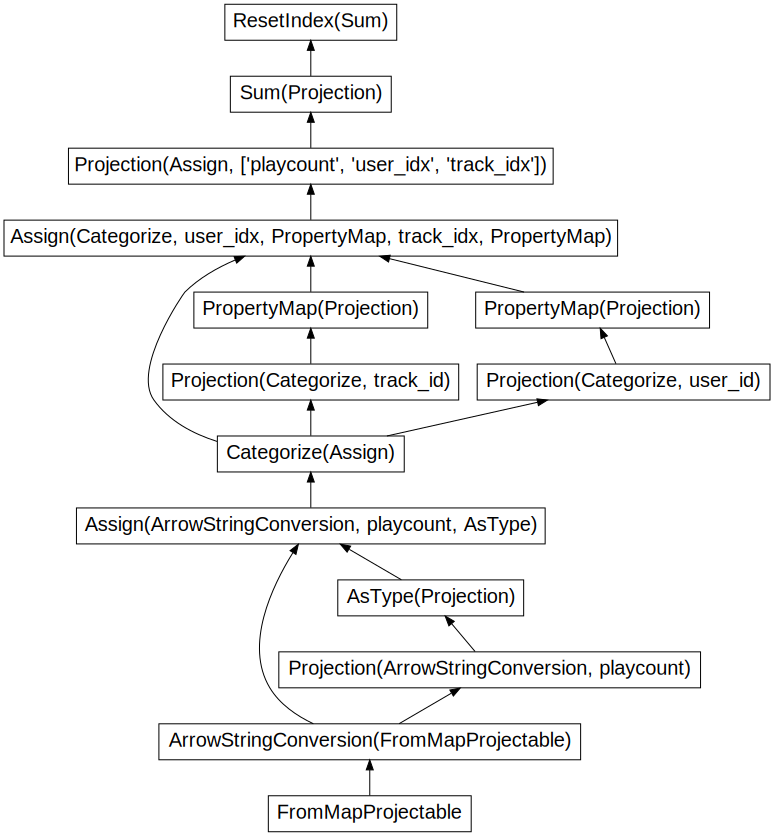

In [ ]:
# step 4: Compute the interaction matrix
# Dask doesn't support pivot tables directly, so we aggregate manually
interaction_array = df.groupby(['track_idx', 'user_idx'])['playcount'].sum().reset_index()

interaction_array.visualize()

In [ ]:
interaction_array

,track_idx,user_idx,playcount
npartitions=1,,,
,int16,int32,float64
,...,...,...


In [ ]:
interaction_array = interaction_array.compute()

In [ ]:
interaction_array

,track_idx,user_idx,playcount
0,0,15780,3.0
1,0,76968,1.0
2,0,134525,2.0
3,0,231541,1.0
4,0,305348,1.0
...,...,...,...
9711296,30458,902360,1.0
9711297,30458,913310,1.0
9711298,30458,922319,1.0
9711299,30458,925779,1.0


In [ ]:
# Step 5: Create a sparse matrix
# Collect the data into a NumPy-friendly format

row_indices = interaction_array['track_idx']
col_indices = interaction_array['user_idx']
values = interaction_array['playcount']

In [ ]:
# Build a sparse matrix
n_tracks = unique_tracks
n_users = unique_users

sparse_matrix = csr_matrix((values, (row_indices, col_indices)), shape=(n_tracks, n_users))

print("Sparse matrix shape:", sparse_matrix.shape)
print("Non-zero elements:", sparse_matrix.nnz)

Sparse matrix shape: (30459, 962037)
Non-zero elements: 9711301


In [ ]:
sparse_matrix[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 161 stored elements and shape (1, 962037)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.where(df['track_id'].cat.categories == "TRXOGZT128F424AD74")

(array([27734]),)

In [ ]:
ind = 27734

In [ ]:
input_array = sparse_matrix[ind]

input_array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 962037)>

In [ ]:
similarity_scores = cosine_similarity(input_array, sparse_matrix)

In [ ]:
np.sort(similarity_scores)[-6:][::-1]

array([[0.        , 0.        , 0.        , ..., 0.23033611, 0.24534413,
        1.        ]])

In [ ]:
similarity_scores.shape

(1, 30459)

In [ ]:
np.argsort(similarity_scores.ravel())[-6:][::-1]

array([27734,  9981, 21226, 16558, 24752,  7361])

In [ ]:
recommendations = df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-6:][::-1]]

In [ ]:
recommendations

Index(['TRXOGZT128F424AD74', 'TRIGTIQ128F14979A3', 'TRRTAAT128F149798E',
       'TRNWXNV128F427EC79', 'TRUVWMG128F427A833', 'TRFUYPH128F429617B'],
      dtype='string', name='track_id')

In [ ]:
filtered_songs[filtered_songs["name"] == "Karma Police"]

,track_id,name,artist,spotify_preview_url
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...


In [ ]:
filtered_songs[filtered_songs["track_id"].isin(recommendations)]

,track_id,name,artist,spotify_preview_url
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
925,TRNWXNV128F427EC79,Black Cadillacs,Modest Mouse,https://p.scdn.co/mp3-preview/13f436de5768db95...
1076,TRFUYPH128F429617B,Brand New Colony,The Postal Service,https://p.scdn.co/mp3-preview/d4501a0e0a49b024...
1270,TRUVWMG128F427A833,Big Big Love (Fig. 2),Foals,https://p.scdn.co/mp3-preview/92bf3b370f86be62...
1953,TRRTAAT128F149798E,Road to Joy,Bright Eyes,https://p.scdn.co/mp3-preview/104c93e1f445fcc1...
6982,TRIGTIQ128F14979A3,A Perfect Sonnet,Bright Eyes,https://p.scdn.co/mp3-preview/61ca618147278dc5...


In [ ]:
def collaborative_recommendation(song_name, user_data, songs_data, interaction_matrix, k=5):
    # fetch the row from songs data
    song_row = songs_data[songs_data["name"] == song_name]
    print(song_row)

    # track_id of input song
    input_track_id = song_row['track_id'].values.item()
    print(input_track_id)

    # index value of track id
    # specific logic to find where the track_id sits in the categorical codes
    ind = np.where(user_data['track_id'].cat.categories == input_track_id)[0].item()
    print(ind)

    # fetch the input vector
    input_array = interaction_matrix[ind]

    # get similarity scores
    similarity_scores = cosine_similarity(input_array, interaction_matrix)

    # get top k recommendations
    # Note: 'df' here refers to the global dataframe variable defined earlier in the notebook
    recommendation_track_ids = df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-k-1:][::-1]]
    print(recommendation_track_ids)

    # get top scores
    top_scores = np.sort(similarity_scores.ravel())[-k-1:][::-1]
    print(top_scores)

   # get the songs from data and print
    temp_df = pd.DataFrame({"track_id": recommendation_track_ids.tolist(),
                            "score": top_scores})
    print(temp_df)

    top_k_songs = (
        songs_data
        .loc[songs_data["track_id"].isin(recommendation_track_ids)]
        .merge(temp_df, on="track_id")
        .sort_values(by="score", ascending=False)
        .drop(columns=["track_id", "score"])
        .reset_index(drop=True)
        )

    return top_k_songs

In [ ]:
collaborative_recommendation(song_name="Crazy in Love",
                             user_data=df,
                             songs_data=filtered_songs,
                             interaction_matrix=sparse_matrix)

                track_id           name   artist  \
3337  TROINZB128F932F740  Crazy in Love  Beyoncé   

                                    spotify_preview_url  
3337  https://p.scdn.co/mp3-preview/807828ea7070bda7...  
TROINZB128F932F740
17018
Index(['TROINZB128F932F740', 'TRURCEI12903CA4395', 'TRYLWIW12903CA438D',
       'TRCVMAF12903D00E61', 'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26'],
      dtype='string', name='track_id')
[1.         0.08225488 0.07217127 0.05592032 0.05529279 0.05404559]
             track_id     score
0  TROINZB128F932F740  1.000000
1  TRURCEI12903CA4395  0.082255
2  TRYLWIW12903CA438D  0.072171
3  TRCVMAF12903D00E61  0.055920
4  TRHRNEE12903CFDBD4  0.055293
5  TRGEUXY128F4226B26  0.054046


,name,artist,spotify_preview_url
0,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
1,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
2,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
3,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...
5,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
